# Homework4  

### problem1   
어떤 대형 도매상에서는 세 종류의 아보카드를 다룬다: 서인도산 (A), 과테말라산 (B), 멕시코산 (C). 서인도산의 무게는 1000 ~ 2000 그램 정도로 가장 크며, 잘 익으면 부드러운 초록부터 붉은 껍질을 갖게 된다. 그리고 기름은 적게는 7%까지로서 가장 적게 함유하고 있다. 서인도산은 케리비안 기후의 낮은 지역에서 잘 자라며. 과테말라산은 (Hass)는 커다란 고지 아보카도로써 무게는 500 ~ 600 그램으로, 두꺼우며 한 껍질, 빼기힘든 단단한 씨, 보통의 기름 함유를 갖는다. 멕시코 산은 비교적 작은 과일로 무게는 75 ~ 300 그램, 얇고 부드러운 검은색 껍질로 빼기쉬운 씨를 갖고 있다. 이 종류는 가장 많은 기름을 (때로는 30%) 함유하고 있으며 건조하면서도 추운 지방에서 자란다.

회사에서 배포하는 것의 50%는 과테말라산, 35%는 멕시코산, 15%는 서인도산 이라고 할 경우, 제품의 확률분포함수(pdf) 를 만들려고 한다.

1-1. (10) 아보카도의 종류에 관계없이 무게의 분포를 나타내는 확률밀도 함수를 만들어 그래프로 그리시오. ( 위에서 주어진 무게의 상한과 하한은 "평균무게 ± 표준편차"를 나타낸다고 가정함.) (Hint: sp.stats.norm.pdf(), plt.plot())

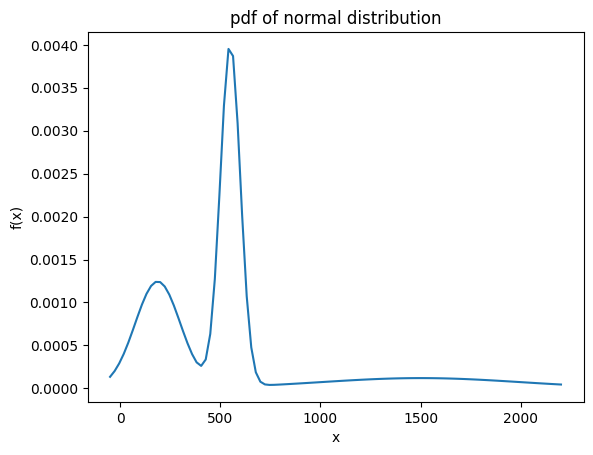

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

xx = np.linspace(-50, 2200, 100)
#====== ~3 lines =========================
india = sp.stats.norm(1500, 500) # (평균, 표준편차)
guatemala = sp.stats.norm(550, 50)
mexico = sp.stats.norm(187.5, 112.5)
#=========================================
plt.plot(xx, 0.15*india.pdf(xx) + 0.5*guatemala.pdf(xx) + 0.35*mexico.pdf(xx))
plt.xlabel('x')
plt.ylabel("f(x)")
plt.title("pdf of normal distribution")
plt.show()

1-2. (10) 이러한 분포에 따라서 N=5,000 의 랜덤 표본을 만들고 적절한 빈 크기를 사용하여 이러한 표본 분포의 히스토그램을 그리시오. (Hint: sp.stats.norm.rvs(), plt.hist())

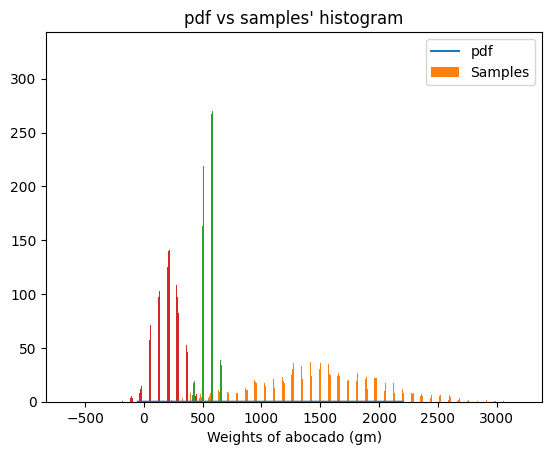

In [30]:
plt.plot(xx, 0.15*india.pdf(xx) + 0.5*guatemala.pdf(xx) + 0.35*mexico.pdf(xx), label="pdf")
plt.title("pdf vs samples' histogram")
#========== ~2 lines ==========
a = india.rvs(size= 5000)
b = guatemala.rvs(size= 5000)
c = mexico.rvs(size= 5000)
plt.hist([a,b,c], bins = 500, label="Samples")
#==============================
plt.xlabel('Weights of abocado (gm)')
plt.legend()
plt.show()

#### 1-3. (5) 이론적 분포와 실험적 분포가 일치 합니까? 왜 또는 왜 아닐까요?

(Your Answer): 이론적 분포와 실험적 분포가 일치합니다. (정확히는 랜덤표본을 많이 추출할 수록, 분포가 일치해짐에 가까워집니다.) 그 이유는 중심 극한 정리에 따라, 포본의 분포가 표본의 크기가 커짐(N이 증가함)에 따라 평균 mu와 분산 sigma^2/N을 갖는 정규분포로 접근 하기 때문입니다.

#### 사전확률은 동일하며 다음과 같은 우도분포(likelihood density)를 같는 두 클래스의 단변량 분류 문제를 고려해보자.  
P(x|ω1)=N(μ=0,σ=2)
 
P(x|ω2)=N(μ=4,σ=2)

#### 2-1. (5) 오류율을 최소화하는 최적의 결정규칙을 결정하라.

P(x|ω1)=12π−−√2e−12(x2)2
 
P(x|ω2)=12π−−√2e−12(x−42)2

![Alt text](image.png)

#### 2-2. (5) 이론적인 오류율을 결정하라 (Hint: 적분에 다음을 사용하세요. scipy.integrate.quad(scipy.stats.norm( , ), from, to) )

In [51]:
import scipy  as sp
from scipy import integrate
e1 = sp.stats.norm(0, 2)
pdf1 = e1.pdf
e2 = sp.stats.norm(4,2)
pdf2 = e2.pdf
#============ ~ 3 lines =========
result1 = sp.integrate.quad(e1.pdf, a = -100, b = 100)
print(result1)
result2 = sp.integrate.quad(e2.pdf, a = -100, b = 100)
print(result2)
error = (result2[1]+result1[1])/2
#================================
print( "theoritical error : ", np.round(error, 2))


(1.0000000000000002, 1.0346447361664605e-12)
(1.0, 1.5447188401736358e-09)
theoritical error :  0.0


In [40]:
A = sp.stats.norm(0 , 2)
result1, e1 = sp.integrate.quad(A, a = -100, b = 100)

ValueError: invalid callable given